####imports


In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
import numpy as np

In [0]:
from fastai.tabular import *
import pandas as pd

In [0]:
df=pd.read_csv('/content/trainms.csv')
df_test=pd.read_csv('/content/testms.csv')

In [0]:
df.head()
df_test.head()

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-29 09:29:37,25,Male,United States,PA,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,Don't know,Yes,Somewhat easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No,NaN
1,2,2014-08-29 09:31:37,42,male,United States,IN,No,Yes,Sometimes,6-25,Yes,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
2,3,2014-08-29 09:31:49,34,male,United States,PA,No,Yes,Often,100-500,No,Yes,Yes,Yes,No,No,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No,NaN
3,4,2014-08-29 09:33:43,26,female,United States,OH,No,No,Sometimes,26-100,Yes,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,No,Some of them,No,Maybe,Maybe,Don't know,Yes,NaN
4,5,2014-08-29 09:35:46,35,Male,United Kingdom,NaN,No,Yes,Sometimes,1-5,No,Yes,No,Yes,No,No,Yes,Very easy,Yes,Yes,Some of them,Some of them,No,Maybe,Yes,Yes,NaN


###Cleaning of dataset:
1.Gender:converted to m/f/t or nan

2.Remove:comments,s no.,state(only given for USA),comments

3.Numeric data-[Family_history,work_interfernce,leave]

4.convert no_of_employees range--> (max-min)/2

5.From timestamp get month and year

6.Remove Age<18 and Age>80

7.coworkers and supervisor convert 'some of them' to yes/1


####1:

In [0]:
x1=list(df['Gender'].unique())
x2=list(df_test['Gender'].unique())

In [0]:
set(x2)-set(x1)

{'Cis Man',
 'Malr',
 'femail',
 'ostensibly male, unsure what that really means',
 'p'}

In [0]:
f=[0,4,9,10,13,14,18,19,25,28,37]
m=[1,2,3,5,7,12,15,16,20,31,33,38,39]
t=[6,8,11,17,22,23,24,26,27,29,30,32,34,35,36]
n=[21,40]

In [0]:
m1=[0,1,3,4,9,10,14]
f1=[2,5,6,8,12,13]
t1=[7,15]
n1=[11]

In [0]:
female=set([x1[i] for i in f]+[x2[i] for i in f1])
male=set([x1[i] for i in m]+[x2[i] for i in m1])
trans=set([x1[i] for i in t]+[x2[i] for i in t1])
Na=set([x1[i] for i in n]+[x2[i] for i in n1])

In [0]:
keys=list(female)+list(male)+list(trans)+list(Na)
values=['f']*len(female)+['m']*len(male)+['t']*len(trans)+[np.NaN]*len(Na)

In [0]:
gender=dict(zip(keys, values))


In [0]:
df.Gender=df.Gender.map(gender)
df_test.Gender=df_test.Gender.map(gender)

In [0]:
df_test.head()

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-29 09:29:37,25,m,United States,PA,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,Don't know,Yes,Somewhat easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No,NaN
1,2,2014-08-29 09:31:37,42,m,United States,IN,No,Yes,Sometimes,6-25,Yes,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
2,3,2014-08-29 09:31:49,34,m,United States,PA,No,Yes,Often,100-500,No,Yes,Yes,Yes,No,No,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No,NaN
3,4,2014-08-29 09:33:43,26,f,United States,OH,No,No,Sometimes,26-100,Yes,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,No,Some of them,No,Maybe,Maybe,Don't know,Yes,NaN
4,5,2014-08-29 09:35:46,35,m,United Kingdom,NaN,No,Yes,Sometimes,1-5,No,Yes,No,Yes,No,No,Yes,Very easy,Yes,Yes,Some of them,Some of them,No,Maybe,Yes,Yes,NaN


####2.

In [0]:
df=df.drop(columns=['s.no','comments','Timestamp','state'])
df_test=df_test.drop(columns=['s.no','comments','Timestamp','state'])

In [0]:
df_test.head()
df.self_employed.unique()


array([nan, 'Yes', 'No'], dtype=object)

####3.

#####1.family_history

In [0]:
list(df['family_history'].unique())

['No', 'Yes']

In [0]:
keys=list(df['family_history'].unique())
values=[0,1]
df.family_history=df['family_history'].map(dict(zip(keys, values)))

In [0]:
df_test.family_history=df_test['family_history'].map(dict(zip(keys, values)))

#####2.work_interfere

In [0]:
keys=list(df.work_interfere.unique())

In [0]:
keys

['Often', 'Rarely', 'Never', 'Sometimes', nan]

In [0]:
values=[1,0.33,0,0.66]

In [0]:
df.work_interfere=df['work_interfere'].map(dict(zip(keys, values)))

In [0]:
df_test.work_interfere=df_test['work_interfere'].map(dict(zip(keys, values)))

#####3.leave

In [0]:
keys=list(df.leave.unique())
keys

['Somewhat easy',
 "Don't know",
 'Somewhat difficult',
 'Very difficult',
 'Very easy']

In [0]:
values=[0.33,np.NaN,0.66,1,0]

In [0]:
df.leave=df['leave'].map(dict(zip(keys, values)))

In [0]:
df_test.leave=df_test['leave'].map(dict(zip(keys, values)))

####4.

In [0]:
keys=list(df.no_employees.unique())
keys.pop(1)

'More than 1000'

In [0]:
values=list()
for i in keys:
  mn,mx=list(map(int,i.split('-')))
  values.append(int((mx+mn)/2))

In [0]:
values+[1000]

[15, 63, 300, 3, 750, 1000]

In [0]:
keys+['More than 1000']

['6-25', '26-100', '100-500', '1-5', '500-1000', 'More than 1000']

In [0]:
df.no_employees=df.no_employees.map(dict(zip(keys, values)))
df_test.no_employees=df_test.no_employees.map(dict(zip(keys, values)))

#####Age

In [0]:
df[df['Age']>80]


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
364,329,m,United States,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No


In [0]:
df.Age[df['Age']>80]=np.NaN
df.Age[df['Age']<18]=np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_test.Age[df_test['Age']<18]=np.NaN
df_test.Age[df_test['Age']>80]=np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


####databunch

In [0]:
dep_var ='treatment'
cat_names = list(df.columns)
cat_names.remove('Age')
cont_names = ["Age"]
procs = [FillMissing, Categorify, Normalize]

In [0]:
cat_names.remove('treatment')

In [0]:
df_test.insert(list(df.columns).index('treatment'), "treatment", [0]*259, True) 

In [0]:
test = TabularList.from_df(df_test,cat_names=cat_names, cont_names=cont_names,procs=procs)
data = (TabularList.from_df(df, cat_names=cat_names, cont_names=cont_names, procs=procs).split_by_rand_pct(seed=2).label_from_df(cols=dep_var).add_test(test).databunch())

###Model

In [0]:
learn = tabular_learner(data, layers=[500,100], metrics=error_rate)

In [497]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.468035,0.635388,0.195000,00:00


In [0]:
preds, y, losses = learn.get_preds(ds_type=DatasetType.Test, with_loss=True)
y = torch.argmax(preds, dim=1)

In [0]:
ans=['Yes' if int(i) else 'No' for i in y]

In [0]:
test = pd.DataFrame(list(zip(list(range(1,len(y)+1)), ans)), 
               columns =['s.no', 'treatment']) 

In [0]:
test.to_csv('test.csv',index=False)

In [0]:
learn.unfreeze()

In [532]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


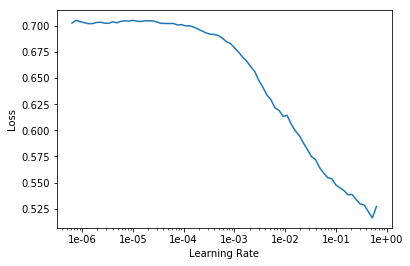

In [533]:
learn.recorder.plot()

In [530]:
learn.fit(1,slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.299378,0.471507,0.185000,00:00


In [534]:
learn.fit_one_cycle(1,1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.633943,0.692670,0.485000,00:00


In [535]:
learn.fit_one_cycle(1,1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.482466,0.689888,0.505000,00:00


In [537]:
learn.fit_one_cycle(1,1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.336209,0.478131,0.190000,00:00
